In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## The first five rows of the data set:

In [2]:
df = pd.read_csv('realestate.csv')
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Description and info of the data set: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Defining x and y data values:

In [5]:
X = df['X3 distance to the nearest MRT station'].values
y = df['Y house price of unit area'].values

In [6]:
X

array([  84.87882,  306.5947 ,  561.9845 ,  561.9845 ,  390.5684 ,
       2175.03   ,  623.4731 ,  287.6025 , 5512.038  , 1783.18   ,
        405.2134 ,   90.45606,  492.2313 , 2469.645  , 1164.838  ,
        579.2083 ,  292.9978 ,  350.8515 ,  368.1363 ,   23.38284,
       2275.877  ,  279.1726 , 1360.139  ,  279.1726 ,  480.6977 ,
       1487.868  ,  383.8624 ,  276.449  ,  557.478  ,  451.2438 ,
       4519.69   ,  769.4034 ,  488.5727 ,  323.655  ,  205.367  ,
       4079.418  , 1935.009  , 1360.139  ,  577.9615 ,  289.3248 ,
       4082.015  , 4066.587  ,  519.4617 ,  512.7871 ,  533.4762 ,
        488.8193 ,  463.9623 ,  640.7391 , 4605.749  , 4510.359  ,
        512.5487 , 1758.406  , 1438.579  ,  492.2313 ,  289.3248 ,
       1160.632  ,  371.2495 ,   56.47425, 4510.359  ,  336.0532 ,
       1931.207  ,  259.6607 , 2175.877  ,  533.4762 ,  995.7554 ,
        123.7429 ,  193.5845 ,  104.8101 ,  464.223  ,  561.9845 ,
         90.45606,  640.7391 ,  424.5442 , 4082.015  ,  379.55

In [7]:
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [8]:
X = X.reshape(-1,1)
X

array([[  84.87882],
       [ 306.5947 ],
       [ 561.9845 ],
       [ 561.9845 ],
       [ 390.5684 ],
       [2175.03   ],
       [ 623.4731 ],
       [ 287.6025 ],
       [5512.038  ],
       [1783.18   ],
       [ 405.2134 ],
       [  90.45606],
       [ 492.2313 ],
       [2469.645  ],
       [1164.838  ],
       [ 579.2083 ],
       [ 292.9978 ],
       [ 350.8515 ],
       [ 368.1363 ],
       [  23.38284],
       [2275.877  ],
       [ 279.1726 ],
       [1360.139  ],
       [ 279.1726 ],
       [ 480.6977 ],
       [1487.868  ],
       [ 383.8624 ],
       [ 276.449  ],
       [ 557.478  ],
       [ 451.2438 ],
       [4519.69   ],
       [ 769.4034 ],
       [ 488.5727 ],
       [ 323.655  ],
       [ 205.367  ],
       [4079.418  ],
       [1935.009  ],
       [1360.139  ],
       [ 577.9615 ],
       [ 289.3248 ],
       [4082.015  ],
       [4066.587  ],
       [ 519.4617 ],
       [ 512.7871 ],
       [ 533.4762 ],
       [ 488.8193 ],
       [ 463.9623 ],
       [ 640.

## Splitting data into train and test data:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

In [10]:
print(f'X-Train Shape [{x_train.shape}]')

X-Train Shape [(331, 1)]


In [11]:
print(f'Y-Train Shape [{y_train.shape}]')

Y-Train Shape [(331,)]


In [12]:
print(f'X-Test Shape [{x_test.shape}]')

X-Test Shape [(83, 1)]


In [13]:
print(f'Y-Test Shape [{y_train.shape}]')

Y-Test Shape [(331,)]


## Regression model:

Text(0.5, 1.0, 'Training Data')

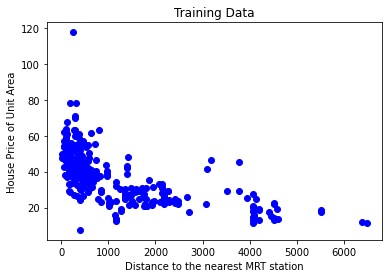

In [14]:
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House Price of Unit Area')
plt.title('Training Data')

In [15]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

## Regression model’s score:

In [16]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

Training Accuracy 44.05%
Test Accuracy 50.85%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

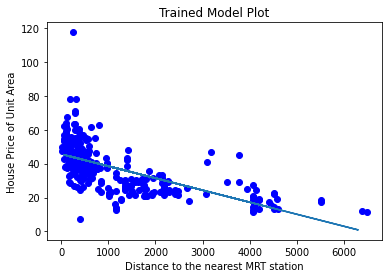

In [17]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_test, y_predict)
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House Price of Unit Area')
plt.title('Trained Model Plot')
plt.plot

## Conclusions:

 - Housing price of unit area widens in range as it gets closer to the MRT station.
 - Housing units are denser closer to the MRT station. 
 - Average housing price of unit area tends to lower as distance from MRT station increases.

